# Harry Potter Housing with Logistical Regression

In [ ]:
#Attempt to open data using csv
import csv
import numpy as np
with open("resources/dataset_train.csv",'r') as dest_f:
    data_iter = csv.reader(dest_f,
                           delimiter = ",",
                           quotechar = '"')
    next(data_iter)
    data = [data for data in data_iter]
data_train = np.asarray(data, dtype = None)


with open("resources/dataset_test.csv",'r') as dest_f:
    data_iter = csv.reader(dest_f,
                           delimiter = ",",
                           quotechar = '"')
    next(data_iter)
    data = [data for data in data_iter]
data_test = np.asarray(data, dtype = None)

# Data Analysis V1

Q1. Make a describe function which takes a dataset as input and outputs the count, mean, max, min, std, 25th percentile, 50th percentile, 75th percentile for all numerical features. Without using the corresponding functions..

In [1]:
def describe_function(data):
    import numpy as np
    import math

    np.warnings.filterwarnings('ignore')
    
    def describe_count(data,column):
        count = 0
        for row in data[:,column]:
            if math.isnan(row):
                continue
            else:
                count += 1
        return(count)

    def describe_mean(data,column):
        count = 0
        total_sum = 0
        for row in data[:,column]:
            if math.isnan(row):
                continue
            else:
                count += 1
                total_sum += row
        mean = total_sum/count
        return(mean)

    def describe_max(data,column):
        max_saved = data[0,column]
        for row in data[:,column]:
            if math.isnan(row):
                continue
            else:
                if row >= max_saved:
                    max_saved = row
                else:
                    continue
        return(max_saved)

    def describe_min(data,column):
        min_saved = data[0,column]
        for row in data[:,column]:
            if math.isnan(row):
                continue
            else:
                if row <= min_saved:
                    min_saved = row
                else:
                    continue
        return(min_saved)


    # assume whole population
    def describe_std(data,column):
        sample_mean = float(describe_mean(data,column))
        total_variance=float(0)
        count=float(0)
        for row in data[:,column]:
            if math.isnan(row):
                continue
            else:
                count += 1
                total_variance+= math.pow((row-sample_mean),2)
        std = math.sqrt(total_variance/(count))
        return(std)

    def describe_perc25(data,column):
        sort = sorted(data[:,0])
        length = len(data[:,0])
        pick = int((25/100)*length)
        percentage = sort[pick]
        return(percentage)

    def describe_perc50(data,column):
        sort = sorted(data[:,0])
        length = len(data[:,0])
        pick = int((50/100)*length)
        percentage = sort[pick]
        return(percentage)

    def describe_perc75(data,column):
        sort = sorted(data[:,0])
        length = len(data[:,0])
        pick = int((75/100)*length)
        percentage = sort[pick]
        return(percentage)
    
    mean = np.zeros(data.shape[1])
    for i in range(0,data.shape[1]):
        try:
            mean[i] = describe_mean(data,i)
        except ZeroDivisionError: 
            mean[i] = 0

    count = np.zeros(data.shape[1])
    for i in range(0,data.shape[1]):
        try:
            count[i] = describe_count(data,i)
        except ZeroDivisionError: 
            count[i] = 0

    std = np.zeros(data.shape[1])
    for i in range(0,data.shape[1]):
        try:
            std[i] = describe_std(data,i)
        except ZeroDivisionError: 
            std[i] = 0

    minimum = np.zeros(data.shape[1])
    for i in range(0,data.shape[1]):
        try:
            minimum[i] = describe_min(data,i)
        except ZeroDivisionError: 
            minnimum[i] = 0

    maximum = np.zeros(data.shape[1])
    for i in range(0,data.shape[1]):
        try:
            maximum[i] = describe_max(data,i)
        except ZeroDivisionError: 
            maximum[i] = 0

    perc_25 = np.zeros(data.shape[1])
    for i in range(0,data.shape[1]):
        try:
            perc_25[i] = describe_perc25(data,i)
        except ZeroDivisionError: 
            perc_25[i] = 0

    perc_50 = np.zeros(data.shape[1])
    for i in range(0,data.shape[1]):
        try:
            perc_50[i] = describe_perc50(data,i)
        except ZeroDivisionError: 
            perc_50[i] = 0

    perc_75 = np.zeros(data.shape[1])
    for i in range(0,data.shape[1]):
        try:
            perc_75[i] = describe_perc75(data,i)
        except ZeroDivisionError: 
            perc_75[i] = 0
    
    info = np.concatenate(([mean], [count], [std],[minimum],[maximum],[perc_25],[perc_50],[perc_75]), axis=0)
    info = np.round_(info, decimals=2)

    features= list()
    for i in range(1,len(data[1])+1):
        features.append('Feature'+str(i))

    counter = len(data[0])
    numberofprints = 0

    while counter >0:
        if counter >4:
            numberofprints += 4
            print('\t''%10s ' %(features[numberofprints-4:numberofprints]))
            row_labels= ['MEAN', "COUNT" ,"STD" ,"MIN" ,"MAXIMUM" ,"PERC_25" ,"PERC_50", "PERC_75"]
            for row_label, row in zip(row_labels[0:8], info[:,numberofprints-4:numberofprints]):
                print('%07s [%s]' % (row_label, ' '.join('%10s' % i for i in row)))
            counter += -4
        else:
            numberofprints +=counter
            print('\t''%10s ' %(features[numberofprints-counter:numberofprints]))
            row_labels= ['MEAN', "COUNT" ,"STD" ,"MIN" ,"MAXIMUM" ,"PERC_25" ,"PERC_50", "PERC_75"]
            for row_label, row in zip(row_labels[0:8], info[:,numberofprints-counter:numberofprints]):
                print('%07s [%s]' % (row_label, ' '.join('%10s' % i for i in row)))
            counter += -counter

In [3]:
import numpy as np
import math
path = "resources/dataset_train.csv"

data = np.genfromtxt(path, delimiter=',', skip_header=1)
describe_function(data)

	['Feature1', 'Feature2', 'Feature3', 'Feature4'] 
   MEAN [     799.5        0.0        0.0        0.0]
  COUNT [    1600.0        0.0        0.0        0.0]
    STD [    461.88        0.0        0.0        0.0]
    MIN [       0.0        nan        nan        nan]
MAXIMUM [    1599.0        nan        nan        nan]
PERC_25 [     400.0      400.0      400.0      400.0]
PERC_50 [     800.0      800.0      800.0      800.0]
PERC_75 [    1200.0     1200.0     1200.0     1200.0]
	['Feature5', 'Feature6', 'Feature7', 'Feature8'] 
   MEAN [       0.0        0.0   49634.57       39.8]
  COUNT [       0.0        0.0     1566.0     1568.0]
    STD [       0.0        0.0   16674.48     520.13]
    MIN [       nan        nan   -24370.0    -966.74]
MAXIMUM [       nan        nan   104956.0    1016.21]
PERC_25 [     400.0      400.0      400.0      400.0]
PERC_50 [     800.0      800.0      800.0      800.0]
PERC_75 [    1200.0     1200.0     1200.0     1200.0]
	['Feature9', 'Feature10', 'Featur

# Data Visualisation V2 

Q2 Make a histogram function which takes a dataset as input and outputs all the relevant histograms in order to answer the following question: Which Hogwarts course has a homogeneous score distribution between the four houses?

## Histogram

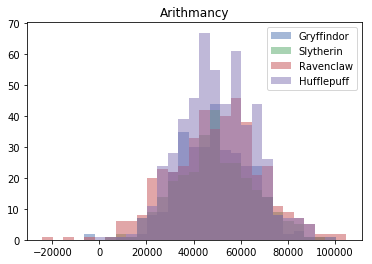

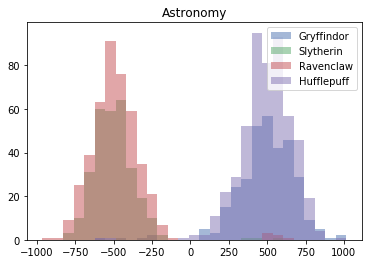

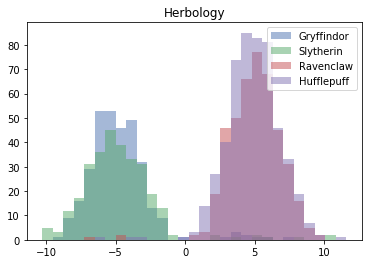

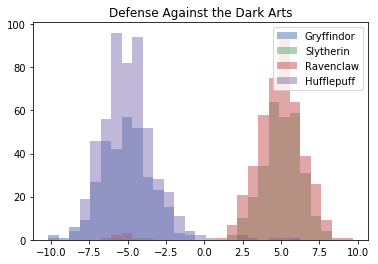

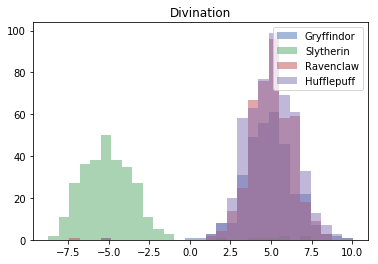

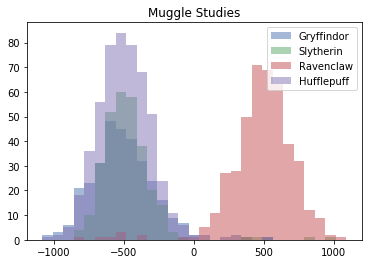

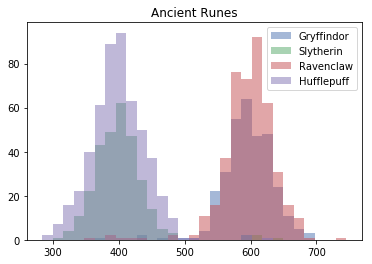

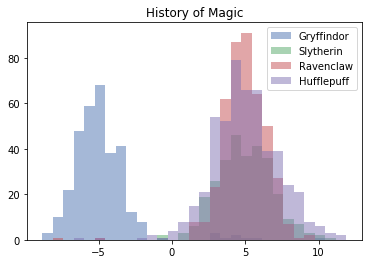

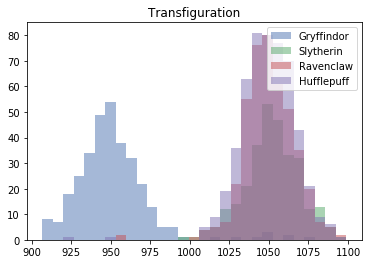

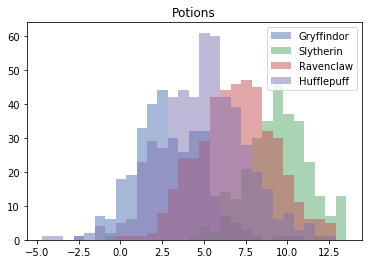

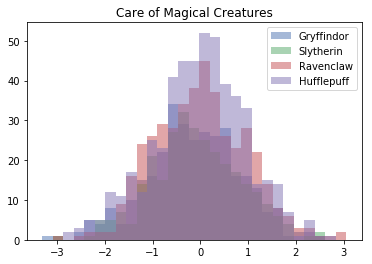

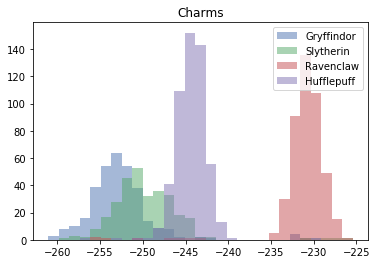

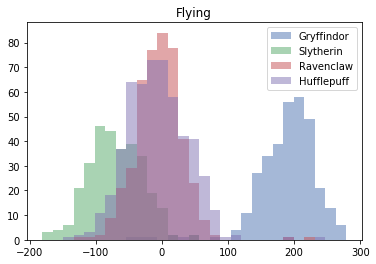

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-deep')

train = pd.read_csv("resources/dataset_train.csv")

def histogram_function(train):
    for i in range(6,train.shape[1]):
        grif = train.loc[train["Hogwarts House"] == "Gryffindor"]
        slyth = train.loc[train["Hogwarts House"] == "Slytherin"]
        rav = train.loc[train["Hogwarts House"] == "Ravenclaw"]
        huff = train.loc[train["Hogwarts House"] == "Hufflepuff"]

        grif = grif.iloc[:,[i]].dropna().values
        slyth = slyth.iloc[:,[i]].dropna().values
        rav = rav.iloc[:,[i]].dropna().values
        huff = huff.iloc[:,[i]].dropna().values

        bin = np.linspace(min(train.iloc[:,[i]].values), max(train.iloc[:,[i]].values), 30)

        plt.hist(grif,label=["Gryffindor"], bins=bin, alpha =0.5)
        plt.hist(slyth,label=["Slytherin"], bins=bin, alpha =0.5)
        plt.hist(rav,label=["Ravenclaw"], bins=bin, alpha =0.5)
        plt.hist(huff,label=["Hufflepuff"], bins=bin, alpha =0.5)
        plt.title(max(train.iloc[:,[i]]))
        plt.legend(loc='upper right')
        plt.show()
        
        
histogram_function(train)

## Scatter-Pair-Plot

Q4 Make a function named pair_plot that displays a plot or scatter peer
plot matrix (depending on the graphics library you will use).
From this visualization, what features will you use to train
your next logistic regression?

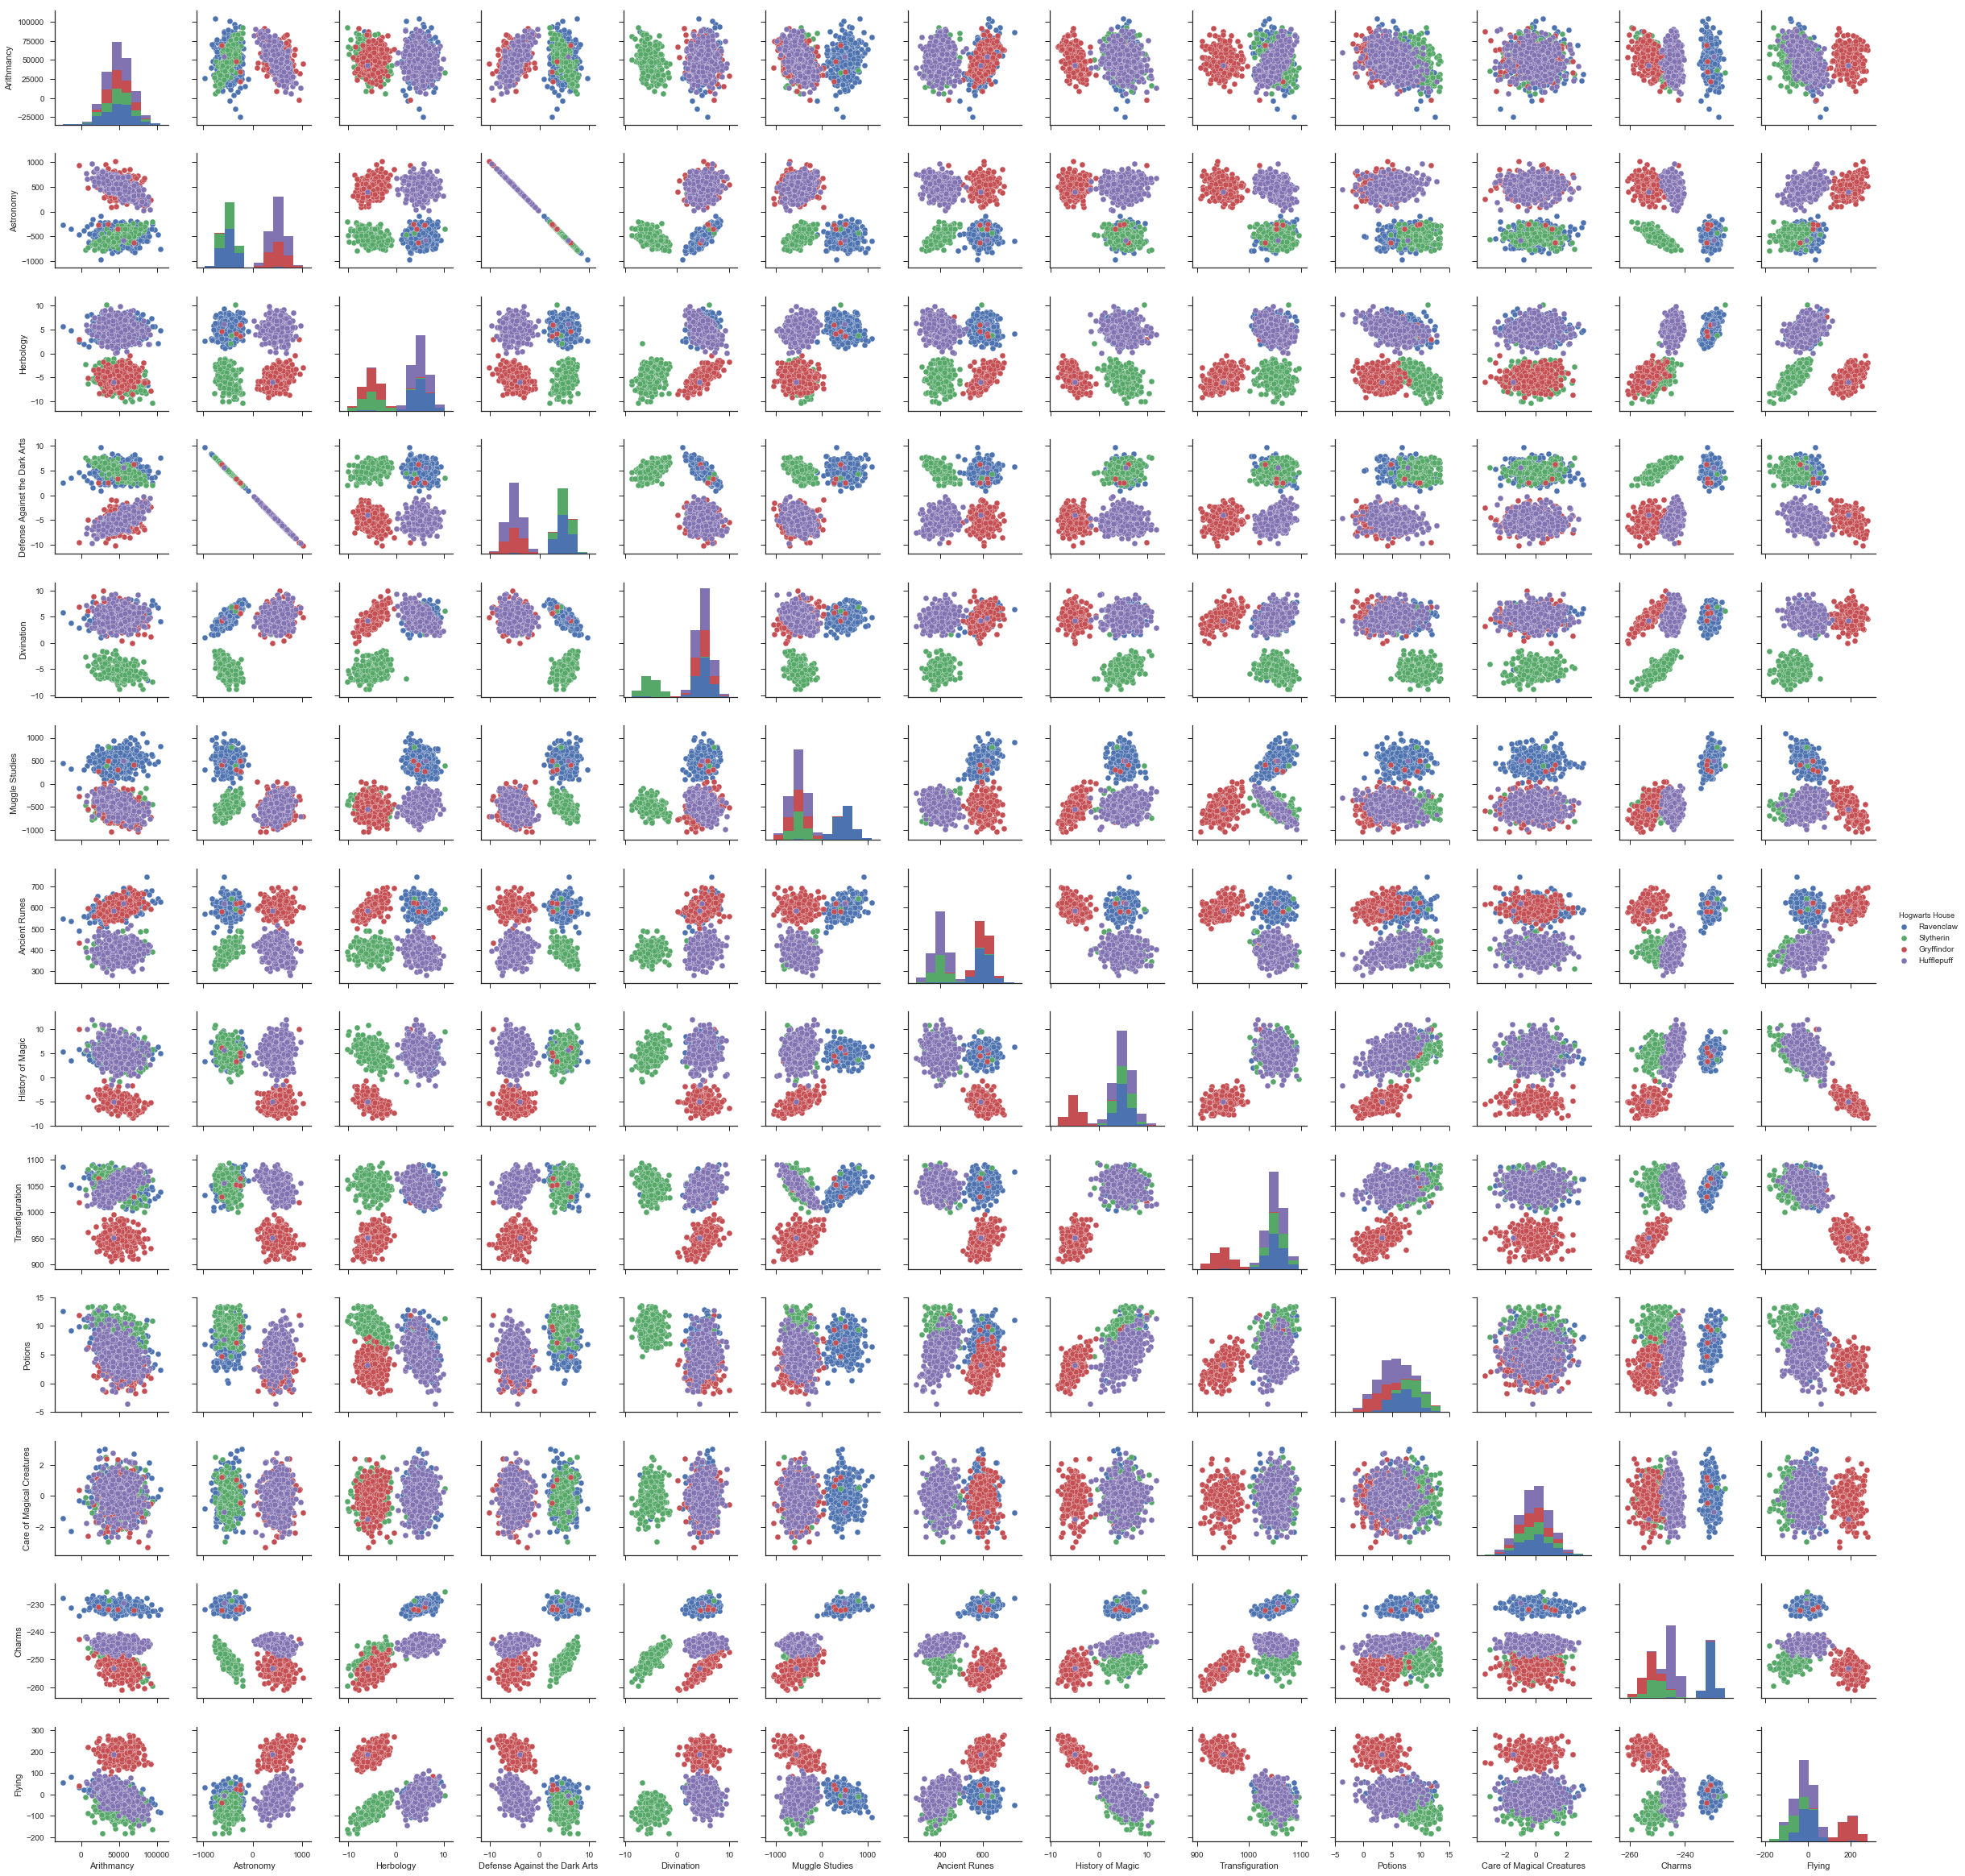

In [6]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd
train = pd.read_csv("resources/dataset_train.csv")
train = train.dropna()
#dropping the index because it does not make any sense to do a scatter pair plot on
train = train.drop("Index", axis=1)
g = sns.pairplot(train, hue="Hogwarts House")

# Scatterplot


Q3. Make a function that takes a dataset as input and outputs a scatterplot which can answer the following question:
What are the two features that are similar?

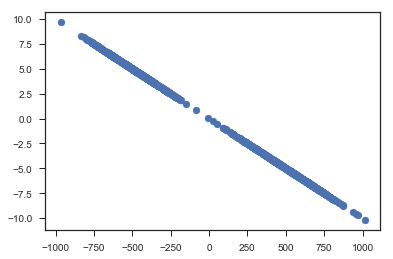

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
train = pd.read_csv("resources/dataset_train.csv")
def scatterplot(data,i,j):
            xcol = data.iloc[:,[i]]
            ycol = data.iloc[:,[j]]
            plt.scatter(xcol,ycol)
            plt.show()
scatterplot(train,7,9)
#These two columns are "Astronomy" and "Defense Against the Dark Arts"

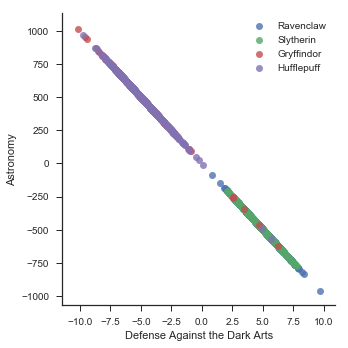

In [8]:
#same plot but now just with colours
sns.lmplot( x="Defense Against the Dark Arts", y="Astronomy", data=train, fit_reg=False, hue='Hogwarts House', legend=False)
plt.legend(loc='upper right')

# Logistic Regression

Q5 You arrive at the last part: code your Magic Hat. To do this, you are asked to perform a multi-classifier using a logistic regression in one-vs-all.
You will have to render two programs:
• a first that goes your models, it is called logreg_train. [Extension].
It takes in parameter dataset_train.csv. For the compulsory part, you must
use the gradient descent technique to minimize the error. The program
generates a file containing the weights that will be reused for the prediction.
• a second named logreg_predict. [Extension]. It takes as parameter
dataset_test.csv and a file containing the previously trained weights.
In order to evaluate the performance of your classifier this second program will have to
generate a houses.csv prediction file formatted strictly in the manner
next:

In [ ]:
#So here we look at the pair plot and see what variables are usefull to group people by
#So we are looking for four clearly different groups

#Astrology 2
#Herbology 3
#Def dark art 2
#Ancient runes 3
#Charms ish

In [79]:
import pandas as pd
import math
train = pd.read_csv("resources/dataset_train.csv")
train = train.fillna(train.mean())
def standardization(train,i):
        mean = (train.iloc[:,[i]].sum())/len(train.iloc[:,[i]])
        sd = math.sqrt((((train.iloc[:,[i]]-mean)**2).sum())/len(train.iloc[:,[i]]))
        train.iloc[:,[i]] = (train.iloc[:,[i]]-mean) / sd

for i in range(0,13):
    standardization(train,(i+6))
train

Index Hogwarts House  First Name    Last Name    Birthday Best Hand  \
0         0      Ravenclaw      Tamara          Hsu  2000-03-30      Left   
1         1      Slytherin       Erich      Paredes  1999-10-14     Right   
2         2      Ravenclaw    Stephany        Braun  1999-11-03      Left   
3         3     Gryffindor       Vesta    Mcmichael  2000-08-19      Left   
4         4     Gryffindor      Gaston        Gibbs  1998-09-27      Left   
5         5      Slytherin     Corrine      Hammond  1999-04-04     Right   
6         6     Gryffindor         Tom        Guido  2000-09-30      Left   
7         7     Hufflepuff      Alicia      Hayward  1997-07-08     Right   
8         8     Gryffindor       Bella   Leatherman  1998-12-07      Left   
9         9     Hufflepuff      Hayden       Aponte  2001-10-13     Right   
10       10     Hufflepuff     Antonio      Denning  1998-05-21     Right   
11       11     Hufflepuff     Neville         Hall  2001-02-16      Left   
12       12     Hufflepuff       Rocky        Trask  2000-03-13     Right   
13       13      Slytherin        Fred        Simms  1997-02-27      Left   
14       14      Ravenclaw         Jan       Saylor  1998-03-16     Right   
15       15      Ravenclaw        Long        Burks  2001-10-03      Left   
16       16     Gryffindor        Fran    Jorgensen  1997-09-23      Left   
17       17     Gryffindor     Freddie         Ward  2001-05-31      Left   
18       18      Ravenclaw      Tyrone       Cooley  2000-03-09     Right   
19       19     Hufflepuff       Elden       Scholl  1999-04-18     Right   
20       20     Gryffindor         Mel       Marion  1998-12-20      Left   
21       21     Gryffindor       Pansy       Mosher  1999-12-15      Left   
22       22      Ravenclaw      Joseph      Coulter  2001-08-22      Left   
23       23     Hufflepuff       Rosie       Tuggle  1999-07-05      Left   
24       24      Ravenclaw      Esther           Li  2001-08-02      Left   
25       25     Hufflepuff       Lucio         Wray  1999-01-21      Left   
26       26      Slytherin     Araceli        Flint  1998-03-01      Left   
27       27     Hufflepuff  Georgianna       Wooten  2000-01-18     Right   
28       28     Gryffindor        Mimi        Baird  1997-05-22      Left   
29       29     Hufflepuff      Brandy       Andrus  2000-12-27     Right   
...     ...            ...         ...          ...         ...       ...   
1570   1570     Hufflepuff     Danette       Amaral  2000-08-18     Right   
1571   1571      Slytherin      Marcel     Pederson  2000-01-07      Left   
1572   1572     Hufflepuff       Vonda      Wingate  2001-07-25      Left   
1573   1573     Gryffindor     Ezekiel      Vallejo  1998-07-16     Right   
1574   1574      Ravenclaw        Jade        Trent  2000-03-08     Right   
1575   1575      Ravenclaw     Laverne       France  2000-10-22      Left   
1576   1576      Ravenclaw       April        Nason  1997-10-12      Left   
1577   1577      Ravenclaw    Germaine    Theriault  1999-12-16     Right   
1578   1578     Gryffindor       Ivory       Boykin  1998-12-01     Right   
1579   1579      Slytherin     Susanne         Linn  1998-09-09     Right   
1580   1580     Hufflepuff      Silvia      Landers  2001-05-06     Right   
1581   1581      Slytherin       Ramon        Crain  2000-05-11      Left   
1582   1582      Ravenclaw   Elizebeth         Wong  2000-08-07      Left   
1583   1583      Slytherin      Deanna      Dowdell  1998-11-07      Left   
1584   1584      Slytherin       Josef        Stoll  1997-09-14     Right   
1585   1585     Hufflepuff     Eduardo       Maness  1998-09-25      Left   
1586   1586      Slytherin        Earl    Mccloskey  1999-01-21      Left   
1587   1587     Hufflepuff     Juliana   Delgadillo  1999-07-21     Right   
1588   1588      Slytherin      Jessie       Tilley  1999-04-16     Right   
1589   1589     Hufflepuff      Dionne        Hynes  2001-06-24      Left   
15

In [ ]:
#Astrology 2
#Herbology 3
#Def dark art 2
#Ancient runes 3
#Charms ish

In [98]:
train_new = train.iloc[:,[1,7,8,9,12]]
train_new["Gryf"] = (train_new["Hogwarts House"]=="Gryffindor").astype(int)
train_new["Slyth"] = (train_new["Hogwarts House"]=="Slytherin").astype(int)
train_new["Rav"] = (train_new["Hogwarts House"]=="Ravenclaw").astype(int)
train_new["Huff"] = (train_new["Hogwarts House"]=="Hufflepuff").astype(int)
train_new
# y defineren als de laatste 4 columns
# x defineren als de col 1:4
# iterate the weight

Hogwarts House  Astronomy  Herbology  Defense Against the Dark Arts  \
0         Ravenclaw  -1.024817   0.888115                   1.020603e+00   
1         Slytherin  -1.149451  -1.380435                   1.144963e+00   
2         Ravenclaw  -0.788249   1.274999                   7.845560e-01   
3        Gryffindor   1.277801  -1.479153                  -1.276948e+00   
4        Gryffindor   0.770974  -1.735432                   1.075714e-17   
5         Slytherin  -1.269136  -1.051568                   1.264385e+00   
6        Gryffindor   1.142442  -1.162487                  -1.141887e+00   
7        Hufflepuff   0.721717   0.927746                  -7.220878e-01   
8        Gryffindor   0.886762  -1.231023                  -8.867692e-01   
9        Hufflepuff   0.946576   1.313184                  -9.464518e-01   
10       Hufflepuff   1.097556   0.841060                  -1.097100e+00   
11       Hufflepuff   0.774434   0.809365                  -7.746888e-01   
12       Hufflepuff   1.299847   0.109291                  -1.298946e+00   
13        Slytherin  -1.134169  -1.636328                   1.129715e+00   
14        Ravenclaw  -0.460909   0.310118                   4.579365e-01   
15        Ravenclaw  -0.946674   0.562694                   9.426322e-01   
16       Gryffindor   0.836770  -1.289578                  -8.368871e-01   
17       Gryffindor   1.187407  -1.154508                  -1.186753e+00   
18        Ravenclaw  -0.370720   1.109783                   3.679452e-01   
19       Hufflepuff   0.812441   1.131033                  -8.126123e-01   
20       Gryffindor   1.289086  -0.968108                  -1.288208e+00   
21       Gryffindor   1.261513  -1.337002                  -1.260696e+00   
22        Ravenclaw  -0.591324   0.931255                   5.880639e-01   
23       Hufflepuff   1.230072  -0.195491                  -1.229324e+00   
24        Ravenclaw  -1.070147   1.321120                   1.065833e+00   
25       Hufflepuff   0.909613   0.962858                  -9.095702e-01   
26        Slytherin  -0.891076  -1.509753                   8.871564e-01   
27       Hufflepuff   1.112431   0.585856                  -1.111942e+00   
28       Gryffindor   0.382773  -1.204272                  -3.838897e-01   
29       Hufflepuff   0.812859   0.424244                  -8.130290e-01   
...             ...        ...        ...                            ...   
1570     Hufflepuff   1.093548   0.308170                  -1.093100e+00   
1571      Slytherin  -1.178629  -1.148509                   1.174077e+00   
1572     Hufflepuff   0.770566   0.214499                  -7.708290e-01   
1573     Gryffindor   0.553843  -1.991405                  -5.545827e-01   
1574      Ravenclaw  -1.498592   1.011154                   1.493336e+00   
1575      Ravenclaw  -0.784451   0.902046                   7.807662e-01   
1576      Ravenclaw  -0.823847   0.221084                   8.200756e-01   
1577      Ravenclaw  -1.294260   0.382706                   1.289453e+00   
1578     Gryffindor   0.737152  -1.429748                  -7.374887e-01   
1579      Slytherin  -0.549656  -0.847231                   5.464881e-01   
1580     Hufflepuff   0.821125   0.680556                  -8.212768e-01   
1581      Slytherin  -1.352751  -1.192962                   1.347815e+00   
1582      Ravenclaw  -1.559909   0.998648                   1.554518e+00   
1583      Slytherin  -1.195534  -0.577584                   1.190945e+00   
1584      Slytherin  -0.753110  -1.090893                   7.494943e-01   
1585     Hufflepuff   0.840057   1.094251                  -8.401674e-01   
1586      Slytherin  -1.019697  -1.845779                   1.015495e+00   
1587     Hufflepuff   0.916582   0.733923                  -9.165234e-01   
1588      Slytherin  -1.033798  -0.648667                   1.029564e+00   
1589     Hufflepuff   1.298114   0.718429                  -1.297216e+00   
1590      Ravenclaw  -1.183346   1.118202            

In [97]:
def sigmoid(z) :  # sigmoid function
    return 1.0/(1.0 + np.exp(-z))

In [100]:
def log_likelihood(X, Y, B):
    Y_pred = np.dot(X, B)
    ll = np.sum( Y*Y_pred - np.log(1 + np.exp(Y_pred)) )
    return ll

In [102]:
def logistic_regression(X, Y, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
        
    # start with all the parameters = 0
    B = np.zeros(X.shape[1])
    
    for step in range(num_steps):
        #print(step)
        Y_pred = np.dot(features, weights)
        predictions = sigmoid(Y_pred)

        # Update weights with gradient
        gradient = np.dot(X.T, (Y - predictions))
        B += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print(log_likelihood(X, Y, B))
        
    return (B)

# Makoto stuff

In [105]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

In [106]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

In [107]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    # start with all the parameters = 0
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        #print(step)
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print(log_likelihood(features, target, weights))
        
    return weights

In [116]:
#validation = train_new[1201:1600]
#train_n = train_new[1:1200]
#train_new.shape

In [126]:
# train data 
for house in ["Rav", "Slyth","Huff","Gryf"]:
    X = train_new.iloc[:,1:4].as_matrix(columns=None) 
            # label of train data
    y = train_new[house].as_matrix(columns=None) 
    weights = logistic_regression(X, y, num_steps = 30000, learning_rate = 5e-5, add_intercept=True)                           

-1078.6311294239003
-179.4768238643561
-179.39299387499233
-1081.8789790868318
-154.05609120528155
-153.86175961169386
-1077.4874796467793
-187.3848996455182
-187.2596763579187
-1083.372875495385
-165.71990939234428
-165.61593348779695


In [124]:
weight_houses = {}
weight_houses["{0}".format(house)] = weights 
weight_houses

{'Huff': array([-3.69477666,  2.86816473,  4.53678427, -1.91304467])}

In [127]:
weights

array([-5.40250036,  2.14267078, -4.1258203 , -2.11547917])

In [146]:
house = "Rav"
X = train_new.iloc[:,1:4].as_matrix(columns=None) 
y = train_new[house].as_matrix(columns=None) 
weights = logistic_regression(X, yexex, num_steps = 30000, learning_rate = 5e-5, add_intercept=True)
weights_rav = weights
house = "Gryf"
X = train_new.iloc[:,1:4].as_matrix(columns=None) 
y = train_new[house].as_matrix(columns=None) 
weights = logistic_regression(X, y, num_steps = 30000, learning_rate = 5e-5, add_intercept=True)
weights_gryf = weights
house = "Slyth"
X = train_new.iloc[:,1:4].as_matrix(columns=None) 
y = train_new[house].as_matrix(columns=None) 
weights = logistic_regression(X, y, num_steps = 30000, learning_rate = 5e-5, add_intercept=True)
weights_slyth = weights
house = "Huff"
X = train_new.iloc[:,1:4].as_matrix(columns=None) 
y = train_new[house].as_matrix(columns=None) 
weights = logistic_regression(X, y, num_steps = 30000, learning_rate = 5e-5, add_intercept=True)
weights_huff = weights
B = np.vstack((weights_rav,weights_gryf,weights_slyth,weights_huff))
print(B)

-1078.6311294239003
-179.4768238643561
-179.39299387499233
-1083.372875495385
-165.71990939234428
-165.61593348779695
-1081.8789790868318
-154.05609120528155
-153.86175961169386
-1077.4874796467793
-187.3848996455182
-187.2596763579187
[-4.3068554  -1.88987156  4.14935343  2.72051836]
[-5.40250036  2.14267078 -4.1258203  -2.11547917]
[-5.89891479 -2.20331151 -3.88713066  2.22078707]
[-3.69477666  2.86816473  4.53678427 -1.91304467]


In [147]:
intercept = np.ones((X.shape[0], 1))
val_final_scores = np.matmul(X,B)
val_preds = pd.DataFrame(sigmoid(val_final_scores))

In [168]:
#X = np.hstack((intercept, X))
B

array([[-4.3068554 , -1.88987156,  4.14935343,  2.72051836],
       [-5.40250036,  2.14267078, -4.1258203 , -2.11547917],
       [-5.89891479, -2.20331151, -3.88713066,  2.22078707],
       [-3.69477666,  2.86816473,  4.53678427, -1.91304467]])

In [169]:
val_preds = pd.DataFrame(sigmoid(val_final_scores))
val_preds

0         1         2         3
0     0.000418  0.042482  0.999929  0.992669
1     0.997029  0.877901  1.000000  0.474058
2     0.000028  0.015707  0.997539  0.996727
3     0.903197  0.609348  0.237543  0.304774
4     0.853850  0.973032  0.999554  0.059274
5     0.983392  0.791532  1.000000  0.657285
6     0.645091  0.461130  0.226897  0.476655
7     0.000017  0.011445  0.003300  0.990392
8     0.808536  0.544654  0.777784  0.451944
9     0.000001  0.004195  0.000106  0.995701
10    0.000014  0.010582  0.000179  0.987448
11    0.000030  0.014263  0.003313  0.987404
12    0.000765  0.044314  0.000536  0.936930
13    0.999324  0.925912  1.000000  0.337311
14    0.004782  0.095583  0.999016  0.970921
15    0.002486  0.079114  0.999961  0.984776
16    0.866657  0.585177  0.871353  0.422498
17    0.616166  0.448752  0.161651  0.478758
18    0.000037  0.016724  0.954099  0.994860
19    0.000004  0.006883  0.000685  0.993745
20    0.309872  0.334137  0.037315  0.576378
21    0.805757  0.535710  0.171103  0.376222
22    0.000154  0.028691  0.996449  0.992715
23    0.005184  0.087113  0.003195  0.884519
24    0.000035  0.017349  0.999743  0.997211
25    0.000010  0.009275  0.000568  0.990757
26    0.997839  0.888133  1.000000  0.390684
27    0.000064  0.018229  0.000425  0.978021
28    0.895435  0.618365  0.995969  0.492685
29    0.000275  0.031835  0.010540  0.970644
...        ...       ...       ...       ...
1570  0.000337  0.033539  0.001472  0.960177
1571  0.988988  0.814977  1.000000  0.602820
1572  0.001020  0.051063  0.033545  0.954409
1573  0.998495  0.890307  0.999167  0.140316
1574  0.000456  0.045407  0.999998  0.994931
1575  0.000255  0.034931  0.999402  0.992532
1576  0.014918  0.143059  0.999970  0.967248
1577  0.012914  0.140892  0.999999  0.978992
1578  0.946318  0.673607  0.965101  0.353605
1579  0.837706  0.590620  0.999995  0.722386
1580  0.000060  0.018244  0.003648  0.983142
1581  0.993686  0.846297  1.000000  0.587706
1582  0.000545  0.048616  0.999999  0.994854
1583  0.761126  0.558953  1.000000  0.844043
1584  0.968559  0.740720  1.000000  0.612361
1585  0.000005  0.007314  0.000622  0.993178
1586  0.999761  0.948078  1.000000  0.237922
1587  0.000037  0.015191  0.001301  0.984704
1588  0.785946  0.568864  1.000000  0.817178
1589  0.000021  0.011986  0.000051  0.982901
1590  0.000141  0.029080  0.999956  0.995731
1591  0.989411  0.815843  1.000000  0.575427
1592  0.320761  0.349547  0.825560  0.696312
1593  0.000359  0.039857  0.999807  0.992338
1594  0.000015  0.010677  0.000196  0.987448
1595  0.758434  0.522482  0.958256  0.538448
1596  0.000017  0.011515  0.006241  0.991064
1597  0.265563  0.321659  0.256835  0.657824
1598  0.000246  0.030600  0.010486  0.972025
1599  0.000012  0.009677  0.000046  0.986671

[1600 rows x 4 columns]

In [158]:
val_final_scores

array([[ -7.78009826,  -3.11525331,   9.55560227,   4.90835279],
       [  5.81574229,   1.97270498,  19.45216265,  -0.1038606 ],
       [-10.46820586,  -4.13781331,   6.00480322,   5.71865283],
       ...,
       [ -1.0172542 ,  -0.74615684,  -1.06248332,   0.65361279],
       [ -8.30824902,  -3.4556893 ,  -4.54716996,   3.54807784],
       [-11.3519192 ,  -4.62830249,  -9.98924189,   4.3044189 ]])

In [163]:
house = ["Rav", "Slyth","Huff","Gryf"]
y = train_new[house].as_matrix(columns=None)

#pd.concat(val_preds,Y)

In [170]:
pd.concat(val_final_scores,(pd.DataFrame(y)))